In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import matplotlib.colors as mcolors
from matplotlib import rcParams
import pickle

rcParams["pdf.fonttype"] = 42
rcParams["ps.fonttype"] = 42

In [2]:
sc.settings.figdir = "fig5"
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(8,8))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


In [3]:
PATH='/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_wound_fbs.h5ad'
adata_i=sc.read_h5ad(PATH)

In [4]:
adata_i.obs.Time.value_counts()

Time
Day30       5507
Day7        3827
Baseline    1268
Day1        1021
Name: count, dtype: int64

In [5]:
sc.settings.figdir = "fig5"

In [6]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(14, 14))

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [7]:
pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'

with open(pickle_file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)


    # List of values to remove
values_to_remove = {"SFRP2", "CTHRC1", "HLA-DRA", "NRG3", "MKX", "RELN", "SFRP4", "CDH19",}

# Remove unwanted values from each list
reynolds_short_final = {
    k: [gene for gene in v if gene not in values_to_remove]
    for k, v in reynolds_short_final.items()
}
reynolds_short_final = {k: v for k, v in reynolds_short_final.items() if k != "F4: DP_HHIP+"}
# Print result to verify

pickle_file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'

with open(pickle_file_path, 'rb') as file:
    LESIONAL = pickle.load(file)
ALL_GENES_NOF8 = {k: v for k, v in LESIONAL.items() if k != "F8"}
ALL_GENES_NOF8 = {k: v for k, v in ALL_GENES_NOF8.items() if k != "F3"}
ALL_GENES_NOF8 = {k: v for k, v in ALL_GENES_NOF8.items() if k != "F1"}

In [8]:
values_to_remove = {"COMP", "COL11A1", "ASPN", 'CREB3L1', "MKX", "RELN", "SFRP4", "CDH19", "COMP", 'CTHRC1',
  'CCN4', "KCNMA1" }

# Remove unwanted values from each list
ALL_GENES_NOF8 = {
    k: [gene for gene in v if gene not in values_to_remove]
    for k, v in ALL_GENES_NOF8.items()
}

In [9]:
WOUND_GENES = reynolds_short_final | ALL_GENES_NOF8

# sfig7c

In [10]:
sc.settings.figdir = "sfig7"


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

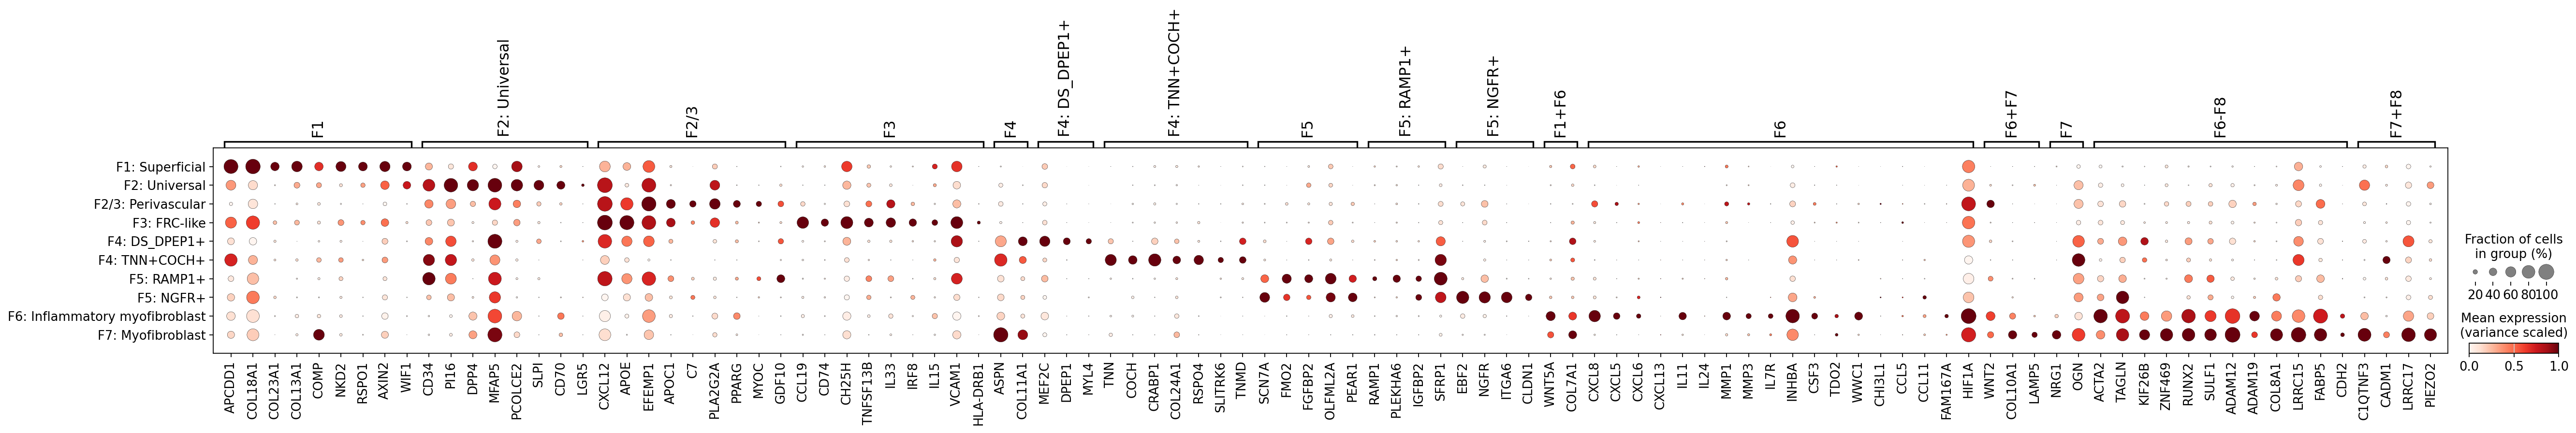

In [11]:
 sc.pl.dotplot(
    adata_i,
    WOUND_GENES,
    groupby=f'annotation',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
    save="s5c_dotplot_wounds.pdf"
)



In [12]:
# Define the file path
file_path = '/nfs/team298/ls34/fb_dict_lesional_FORWOUND.pkl'

# Save the dictionary
with open(file_path, 'wb') as file:
    pickle.dump(WOUND_GENES, file)

print(f"Dictionary saved to {file_path}")

Dictionary saved to /nfs/team298/ls34/fb_dict_lesional_FORWOUND.pkl


In [13]:
pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'

with open(pickle_file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)


values_to_remove = {"SFRP2", "CTHRC1", "HLA-DRA", "NRG3", "MKX", "RELN", "SFRP4", "CDH19",}

reynolds_short_final = {
    k: [gene for gene in v if gene not in values_to_remove]
    for k, v in reynolds_short_final.items()
}



pickle_file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'

with open(pickle_file_path, 'rb') as file:
    LESIONAL = pickle.load(file)
    
ALL_GENES_NOF8 = {k: v for k, v in LESIONAL.items() if k != "F8"}
ALL_GENES_NOF8 = {k: v for k, v in ALL_GENES_NOF8.items() if k != "F3"}
ALL_GENES_NOF8 = {k: v for k, v in ALL_GENES_NOF8.items() if k != "F1"}

In [14]:
WOUND_GENES_PLUSDP = reynolds_short_final | ALL_GENES_NOF8

In [15]:
# Define the file paAth
file_path = '/nfs/team298/ls34/fb_dict_lesional_FORWOUND_PLUSDP.pkl'

# Save the dictionary
with open(file_path, 'wb') as file:
    pickle.dump(WOUND_GENES_PLUSDP, file)

print(f"Dictionary saved to {file_path}")

Dictionary saved to /nfs/team298/ls34/fb_dict_lesional_FORWOUND_PLUSDP.pkl


In [16]:
FBS = {'F1': ['APCDD1',
  'COL18A1',
  'COL23A1',
  'COL13A1',
  'COMP',
  'NKD2',
  'RSPO1',
  'AXIN2',
  'WIF1',
  'SFRP2'],
                   
                 
 'F2: Universal': ['CD34',
  'PI16',
  'DPP4',
  'MFAP5',
  'PCOLCE2',
  'CTHRC1',
  'SLPI',
  'CD70',
  'LGR5'],
 'F2/3: Bridge': ['CXCL12',
  'APOE',
  'EFEMP1',
  'APOC1',
  'C7',
  'PLA2G2A',
  'PPARG',
  'MYOC',
  'GDF10'],
       
 'F3': ['CCL19',
  'CD74',
  'CH25H',
  'TNFSF13B',
  'IL33',
  'IRF8',
  'IL15',
  'VCAM1',
  'HLA-DRA',
  'HLA-DRB1'],
          "Activated F3": ["ADAMDEC1", "CXCL9", "CXCL10"],
 'F4': ['ASPN'],
 'F4: DS_DPEP1+': ['COL11A1', 'MEF2C', 'DPEP1', 'MYL4'],
 'F4: TNN+COCH+': ['TNN',
  'COCH',
  'CRABP1',
  'COL24A1',
  'RSPO4',
  'SLITRK6',
  'NRG3',
  'MKX',
  'TNMD'],
 'F4: DP_HHIP+': ['CORIN',
  'BMP7',
  'WNT5A',
  'LEF1',
  'HHIP',
  'RSPO3',
  'INHBA',
  'PTCH1'],
 'F5': ['SCN7A', 'FMO2', 'FGFBP2', 'OLFML2A'],
 'F5+: RAMP1': ['RAMP1', 'RELN', 'PLEKHA6', 'IGFBP2', 'SFRP1'],
 'F5: NGFR+': ['EBF2', 'NGFR', 'SFRP4', 'ITGA6', 'CDH19', 'CLDN1'],

         
         }



In [17]:
ALL_GENES={'F1': ['APCDD1',
  'COL18A1',
  'COL23A1',
  'COL13A1',
  'COMP',
  'NKD2',
  'RSPO1',
  'AXIN2',
  'WIF1',
  'SFRP2'],
 'F2: Universal': ['CD34',
  'PI16',
  'DPP4',
  'MFAP5',
  'PCOLCE2',
  'CTHRC1',
  'SLPI',
  'CD70',
  'LGR5'],
 'F2/3: Bridge': ['CXCL12',
  'APOE',
  'EFEMP1',
  'APOC1',
  'C7',
  'PLA2G2A',
  'PPARG',
  'MYOC',
  'GDF10'],
 'F3': ['CCL19',
  'CD74',
  'CH25H',
  'TNFSF13B',
  'IL33',
  'IRF8',
  'IL15',
  'VCAM1',
  'HLA-DRA',
  'HLA-DRB1'],
 'F4': ['ASPN'],
 'F4: DS_DPEP1+': ['COL11A1', 'MEF2C', 'DPEP1', 'MYL4'],
 'F4: TNN+COCH+': ['TNN',
  'COCH',
  'CRABP1',
  'COL24A1',
  'RSPO4',
  'SLITRK6',
  'NRG3',
  'MKX',
  'TNMD'],
 'F5': ['SCN7A', 'FMO2', 'FGFBP2', 'OLFML2A'],
 'F5+: RAMP1': ['RAMP1', 'RELN', 'PLEKHA6', 'IGFBP2', 'SFRP1'],
 'F5: NGFR+': ['EBF2', 'NGFR', 'SFRP4', 'ITGA6', 'CDH19', 'CLDN1'],
          'F1+F6:My_Inf': ['WNT5A', 'COL7A1'],
            'F6 (both)': ['WNT2', 'COL10A1', 'LAMP5'],
 'F6: Myofibroblast inflammatory': ['CXCL8',
  'CXCL5',
  'CXCL6',
  'CXCL13',
  'IL11',
  'IL24',
  'MMP1',
  'MMP3',
  'IL7R',
  'INHBA',
  'CSF3',
  'TDO2',
  'WWC1',
  'CHI3L1',
  'STAT4',
  'CCL5',
  'CCL3',
  'CCL11', "FAM167A"],
 'F6: MyoFb': ['NRG1', 'OGN', 'ACTA2',
  'TAGLN',
  'ASPN',
  'KIF26B',
  'ZNF469',
  'RUNX2',
  'SULF1',
  'ADAM12',
  'COL8A1',
  'LRRC15',
  'CREB3L1',
  'CTHRC1',
  'CCN4',
  'FABP5',
  'CDH2', 'C1QTNF3', 'CADM1', 'LRRC17', 'PIEZO2', 'SFRP4', 'KCNMA1'],
          
          
          }

# fig 5d

In [18]:
sc.settings.figdir = "fig5"


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


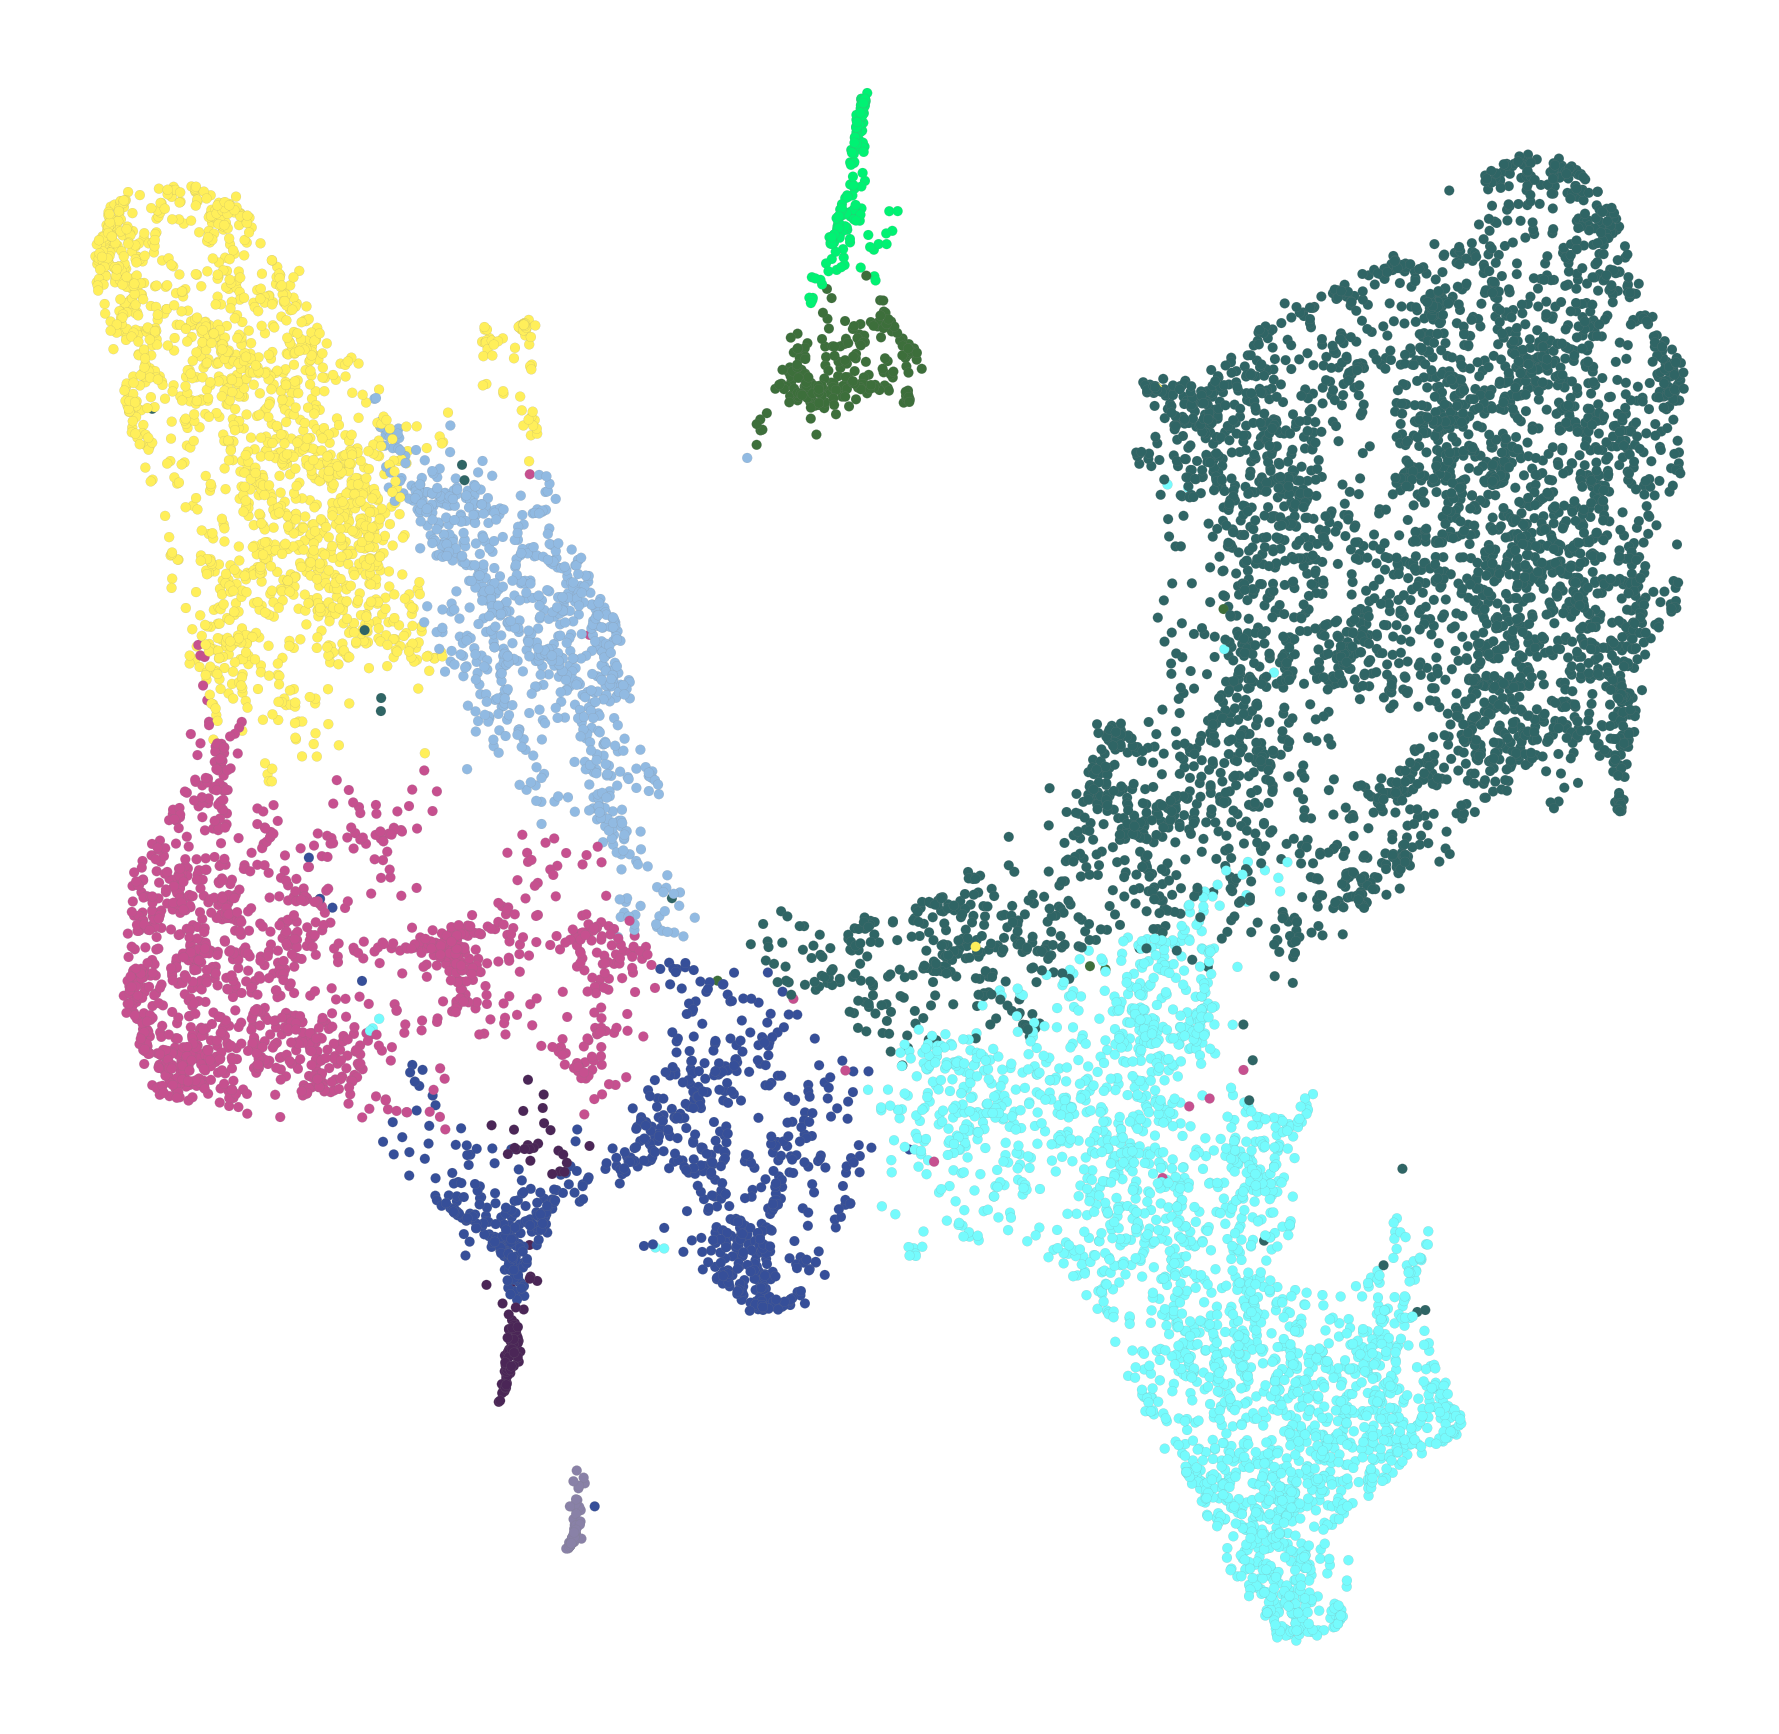

In [19]:
custom_colors = {    'F1: Superficial': '#ffef5a',
    'F2/3: Perivascular': '#364f99',
    'F2: Universal': '#91bae2',
    'F3: FRC-like': '#c6508f',
    'F4: DP_HHIP+': '#c9efb4',
    'F4: DS_DPEP1+': '#3d6f3b',
    'F4: TNN+COCH+': '#00f273',
    'F5: NGFR+': '#8981a7',
    'F5: RAMP1+': '#4b2657',
     'F6: Inflammatory myofibroblast': "#75fbfd",
     'F7: Myofibroblast': "#2f6565",
       'F8: Fascia-like myofibroblast': '#dd7465',
 'F_Fascia': "#0000004D",
                               }


try:
    adata_i.uns["annotation_colors"] = [custom_colors[cat] for cat in adata_i.obs["annotation"].cat.categories]
except KeyError as e:
    print(f"Error: Missing color for category {e}")


sc.pl.umap(
    adata_i,
    color='annotation',
    show=True,
    frameon=False,
    legend_loc=None,
    legend_fontsize=15,
    s=80,
    title='',
    legend_fontoutline=2,
    save="7d_mainpart_wounds_umap.pdf",
    edgecolor='grey', 
    linewidth=.05
)


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


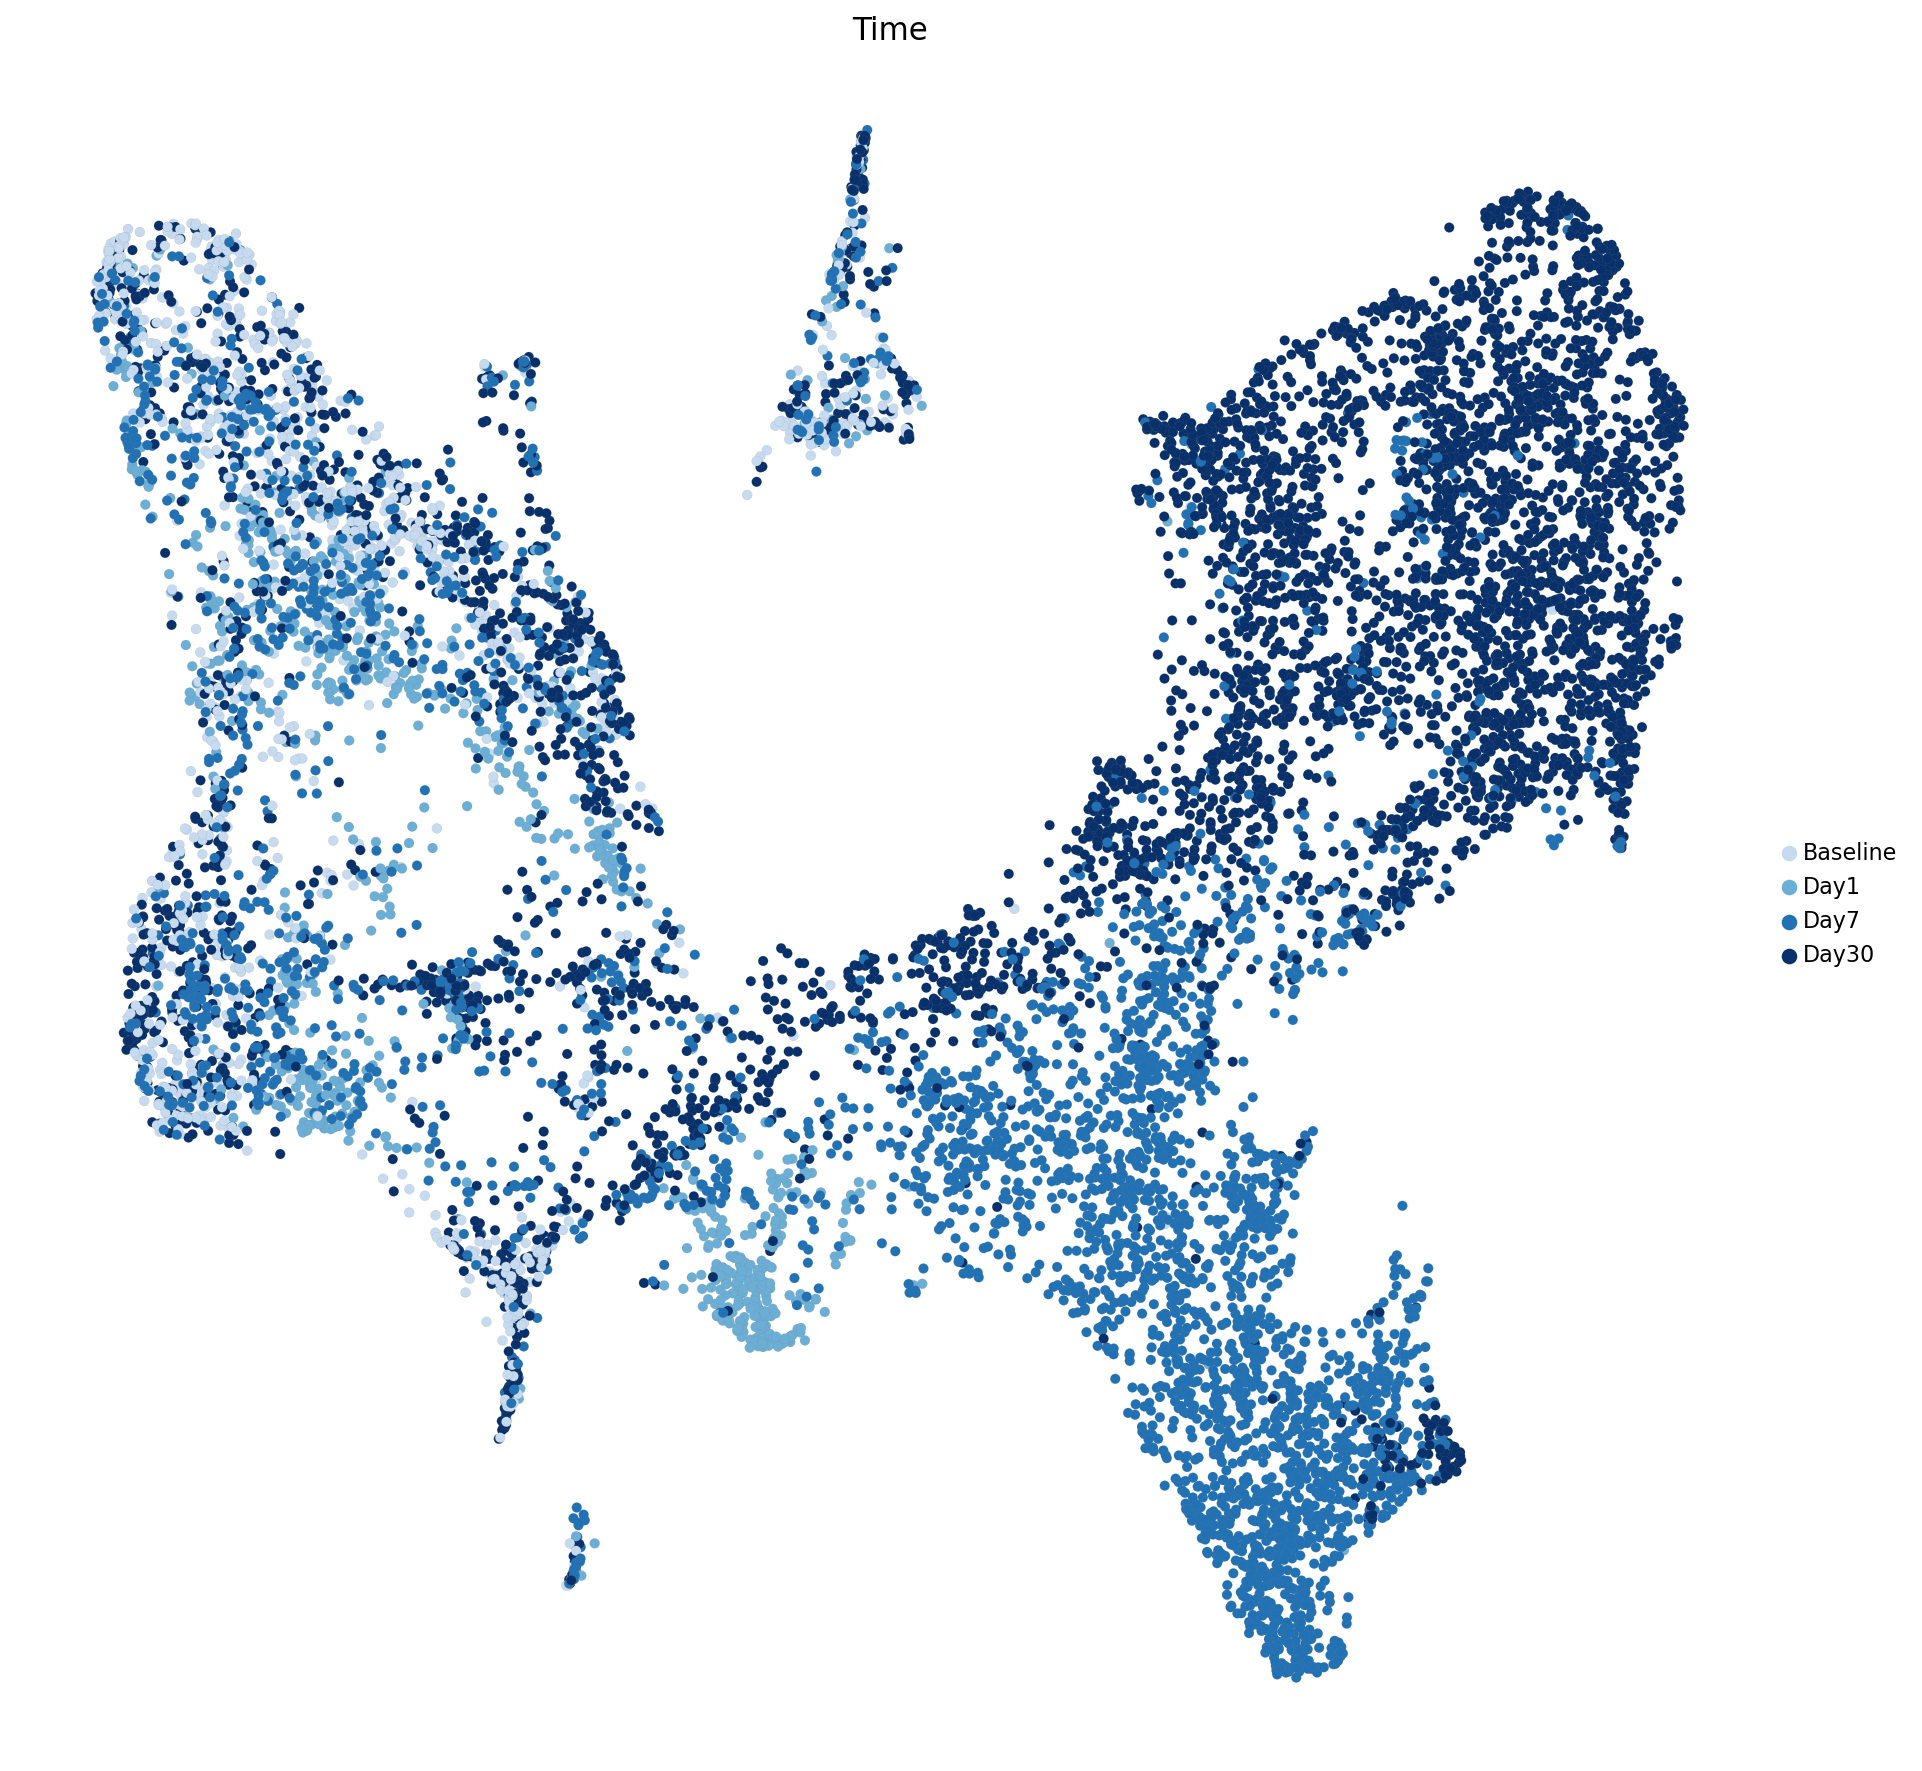

In [20]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(14, 14))

custom_palette = {
    "Baseline": "#c6dbef" , 
    "Day1":   "#6baed6",   
    "Day7":  "#2171b5",     
    "Day30":  "#08306b"    
}


sc.pl.umap(
    adata_i,
    color="Time",
    s=80,
    palette=custom_palette,   
    legend_fontoutline=2,
    legend_fontsize=10,
        save="7d_wounds_umap_time.pdf",
        edgecolor='grey', 
    linewidth=.05
)

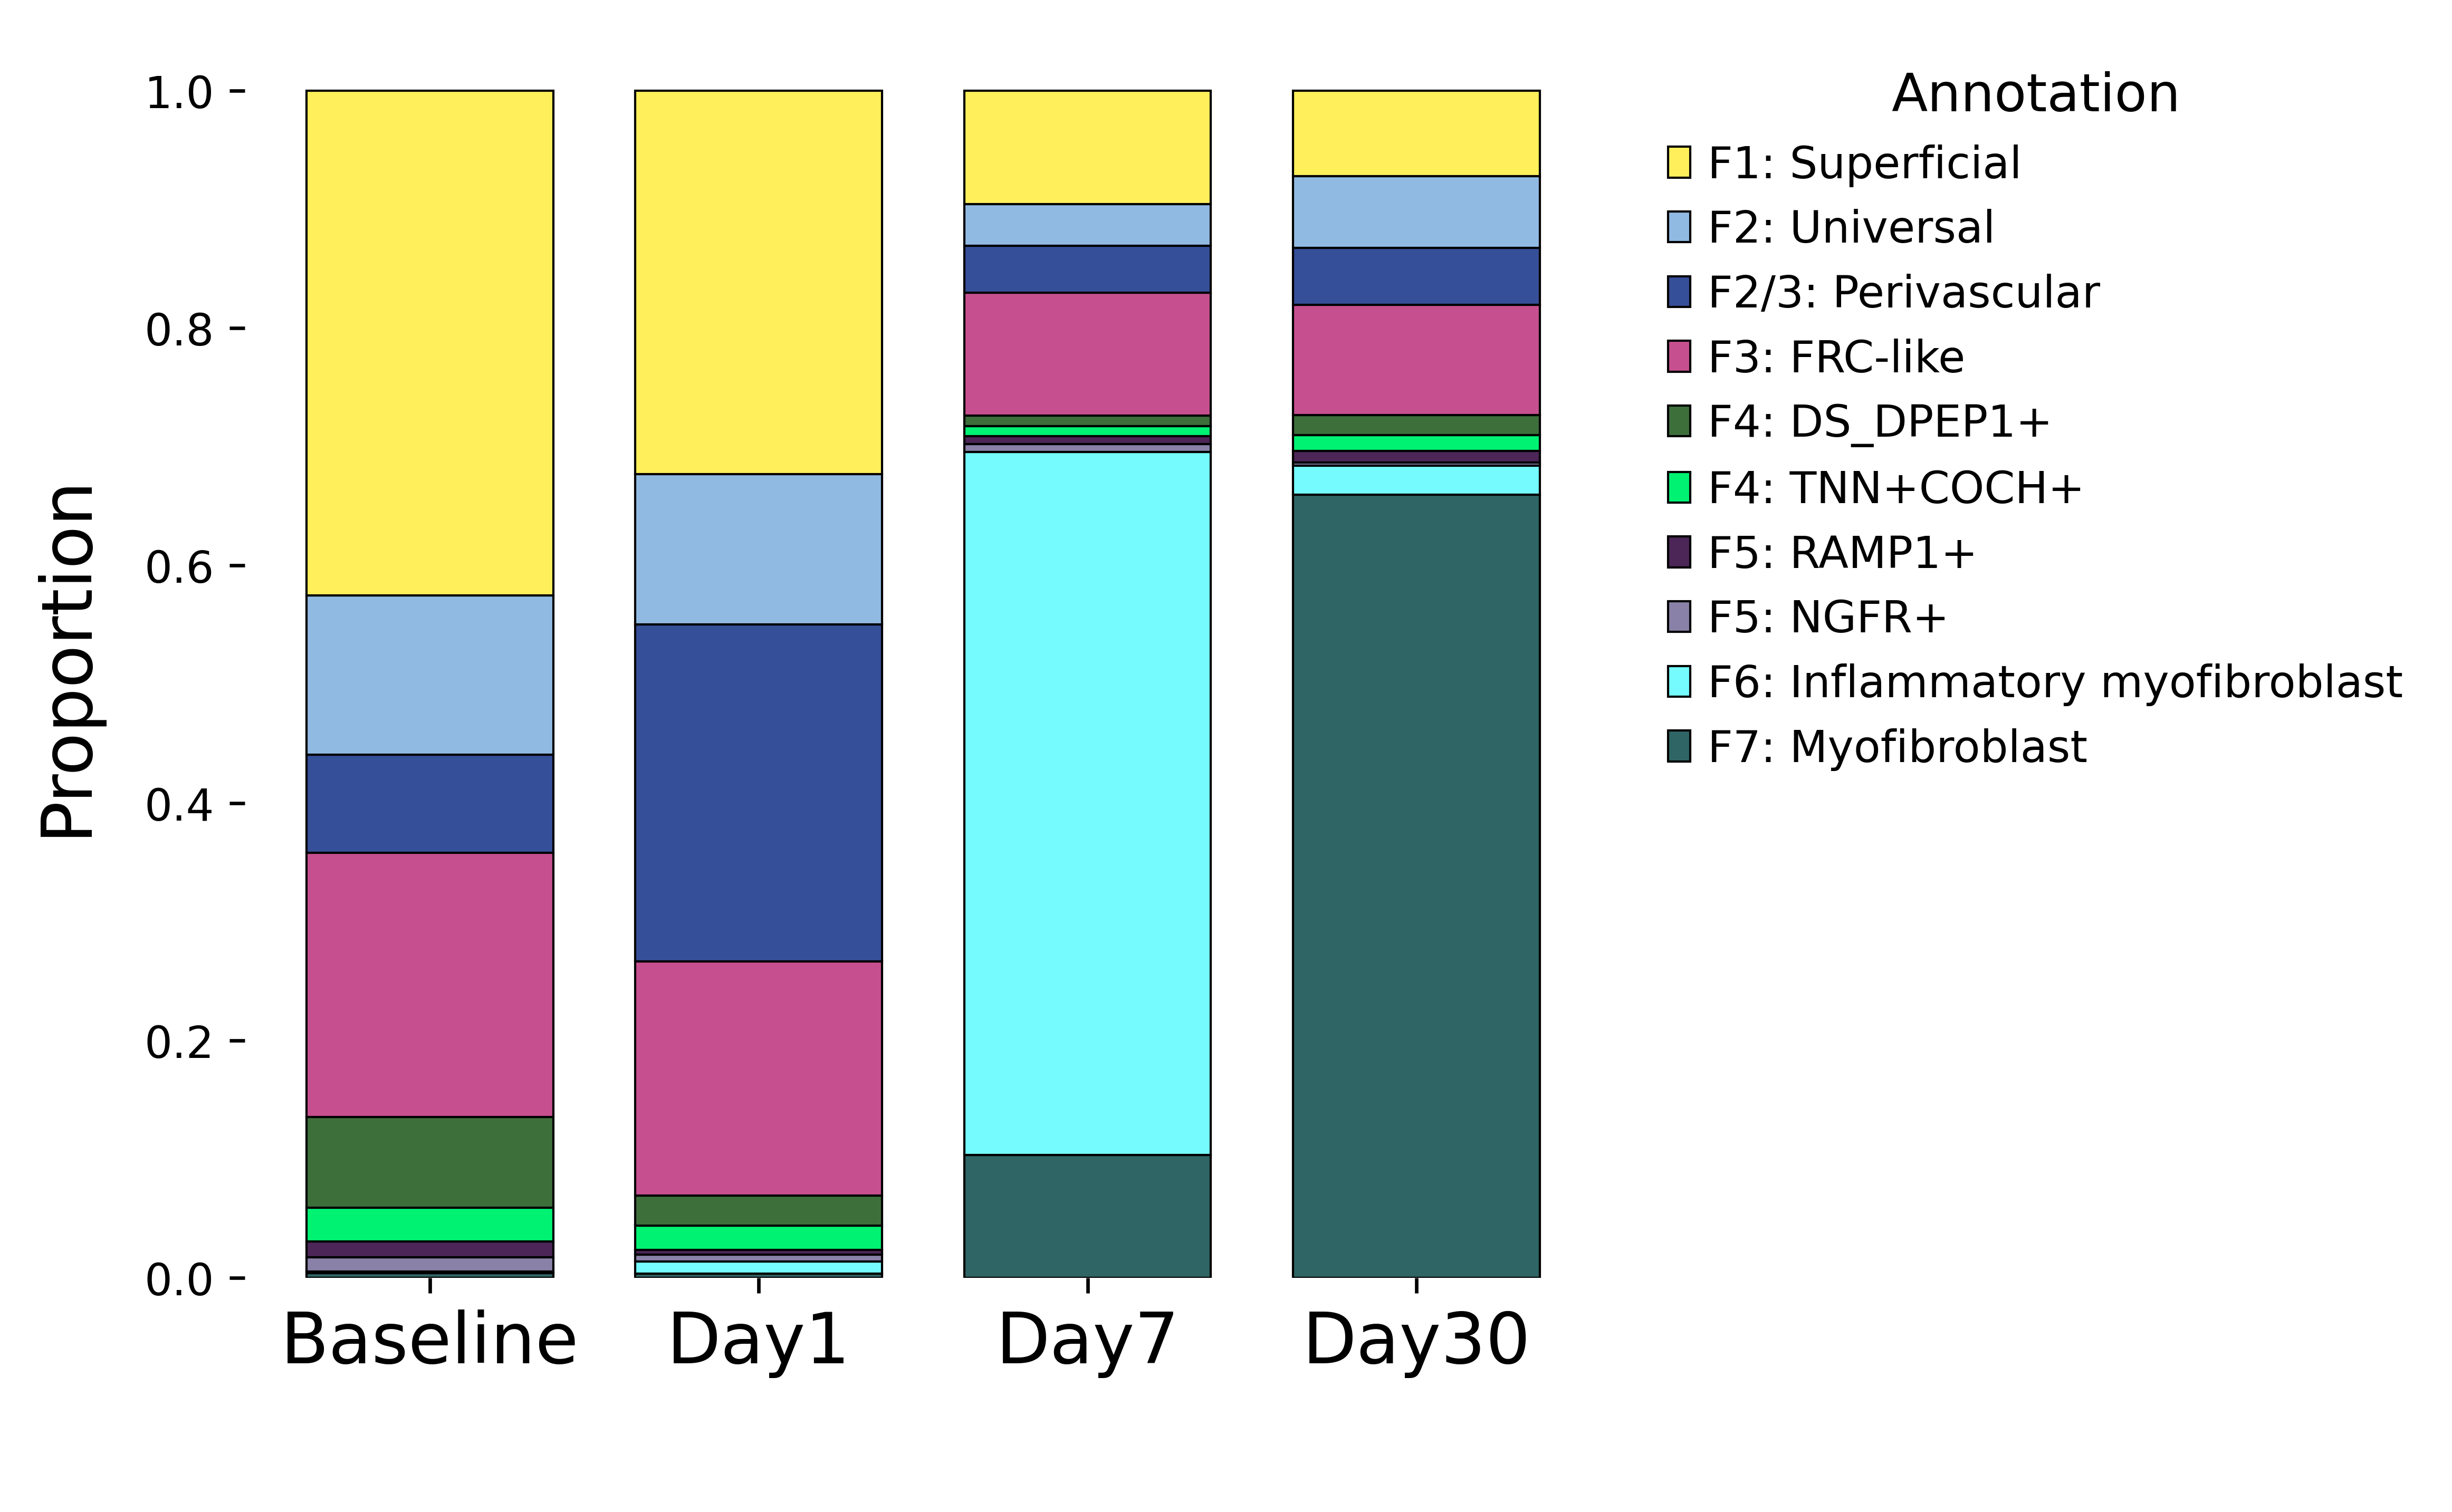

In [21]:
grouped = adata_i.obs.groupby(['Time', 'annotation'], observed=True).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)
annotation_counts = adata_i.obs["annotation"].value_counts()
sorted_annotations = annotation_counts.index
proportions = proportions[sorted_annotations.intersection(proportions.columns)]

ORDER = [
    'F1: Superficial', 'F2: Universal', 'F2/3: Perivascular', 'F3: FRC-like',
    'F4: DS_DPEP1+', 'F4: TNN+COCH+', 'F5: RAMP1+', 'F5: NGFR+', 
    'F6: Inflammatory myofibroblast', 'F7: Myofibroblast'
]
existing_order = [ann for ann in ORDER if ann in proportions.columns]
proportions = proportions[existing_order]


color_list = [custom_colors.get(ann, np.array([0.8, 0.8, 0.8, 1.0])) for ann in proportions.columns]
fig, ax = plt.subplots(figsize=(8, 5), dpi=300, )

bar_width = 0.75  
indices = np.arange(len(proportions))

bottom = np.zeros(len(proportions))
for i, annotation in enumerate(reversed(proportions.columns)):  
    heights = np.nan_to_num(proportions[annotation])

    ax.bar(
        indices,
        heights,
        bar_width,
        bottom=bottom,
        color=color_list[-(i + 1)],  # Use custom RGBA color
        label=annotation,
        edgecolor="black" if np.any(heights > 0) else None,
        linewidth=0.5
    )
    bottom += heights

ax.set_xticks(indices)
ax.set_xticklabels(proportions.index, rotation=0, fontsize=16)

ax.set_xlabel(' ', fontsize=14, labelpad=10)
ax.set_ylabel('Proportion', fontsize=16, labelpad=10)
plt.yticks(fontsize=10)
plt.ylim(0, 1.05)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.02, 1), loc='upper left', 
                   frameon=False, fontsize=10, title="Annotation", title_fontsize=12)
plt.setp(legend.get_texts(), fontsize='10')

plt.tight_layout()
#plt.savefig("fig5/time_barplot_wound.pdf", dpi=300, bbox_inches="tight", format="pdf")  
plt.show()
 

/tmp/ipykernel_14375/1956357204.py:57: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


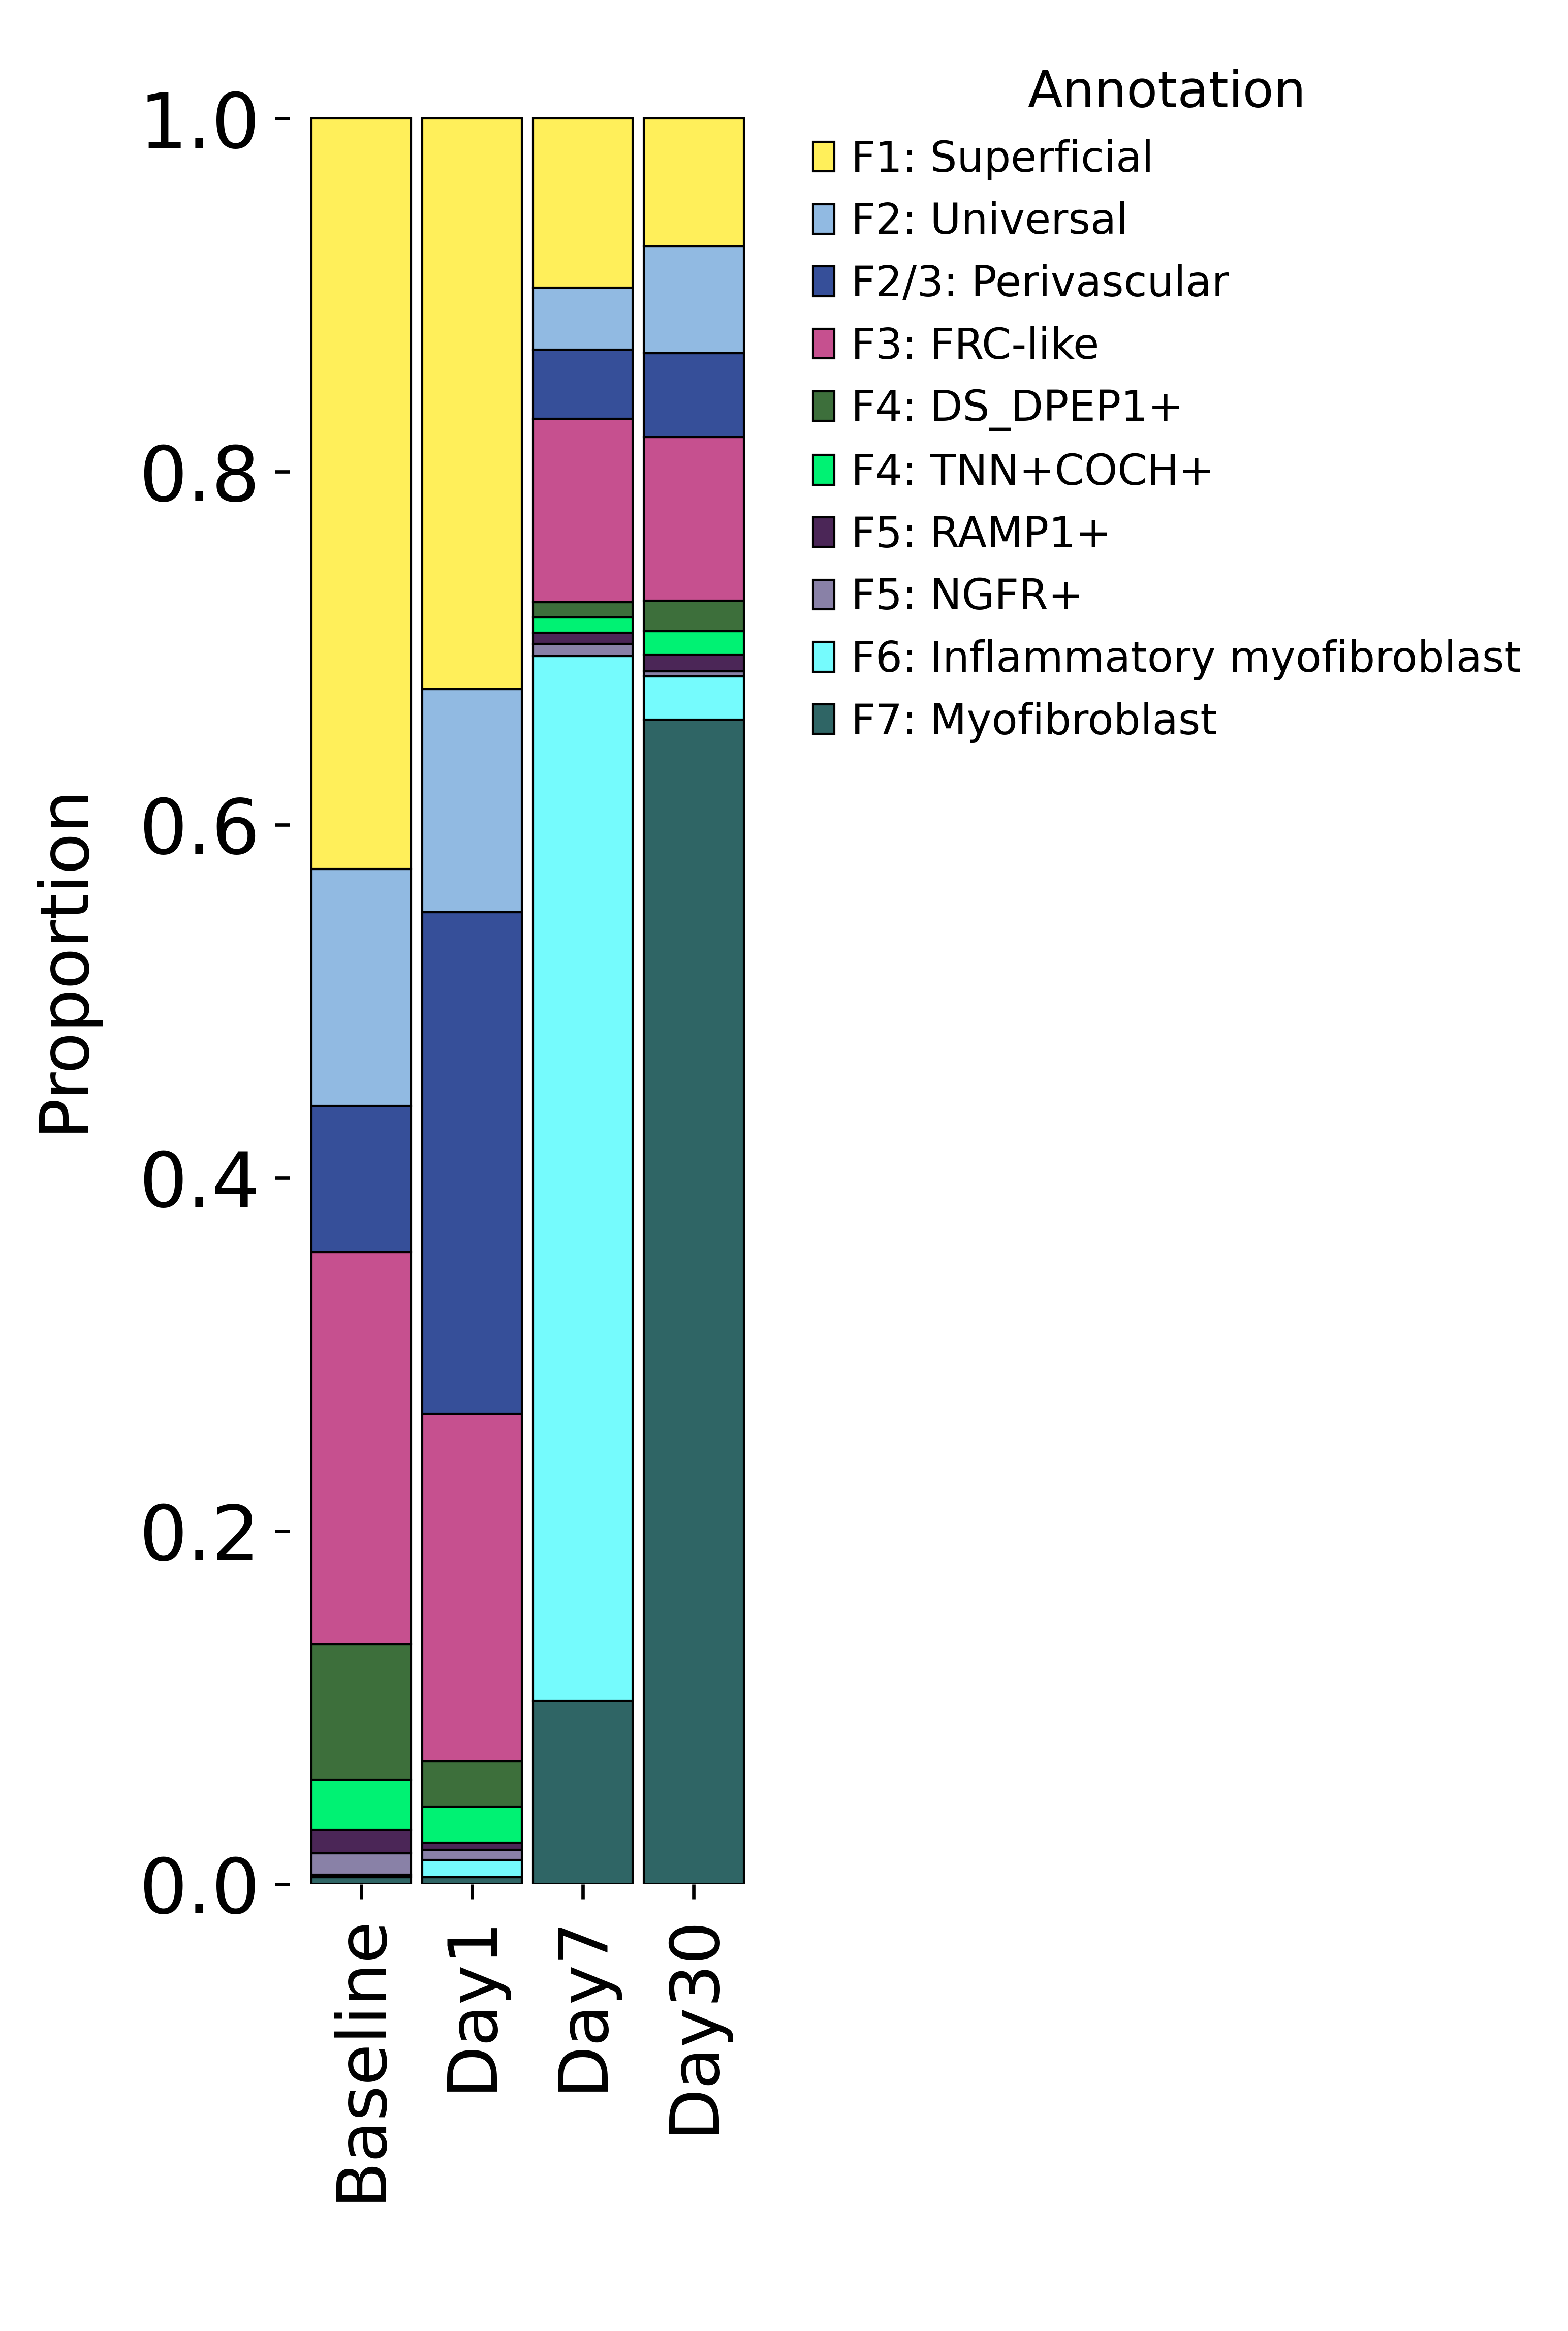

In [22]:
grouped = adata_i.obs.groupby(['Time', 'annotation'], observed=True).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)
annotation_counts = adata_i.obs["annotation"].value_counts()
sorted_annotations = annotation_counts.index
proportions = proportions[sorted_annotations.intersection(proportions.columns)]

ORDER = [
    'F1: Superficial', 'F2: Universal', 'F2/3: Perivascular', 'F3: FRC-like',
    'F4: DS_DPEP1+', 'F4: TNN+COCH+', 'F5: RAMP1+', 'F5: NGFR+', 
    'F6: Inflammatory myofibroblast', 'F7: Myofibroblast'
]
existing_order = [ann for ann in ORDER if ann in proportions.columns]
proportions = proportions[existing_order]


color_list = [custom_colors.get(ann, np.array([0.8, 0.8, 0.8, 1.0])) for ann in proportions.columns]
fig, ax = plt.subplots(figsize=(2, 8), dpi=300, )

bar_width = .9
indices = np.arange(len(proportions))

bottom = np.zeros(len(proportions))
for i, annotation in enumerate(reversed(proportions.columns)):  
    heights = np.nan_to_num(proportions[annotation])

    ax.bar(
        indices,
        heights,
        bar_width,
        bottom=bottom,
        color=color_list[-(i + 1)],  # Use custom RGBA color
        label=annotation,
        edgecolor="black" if np.any(heights > 0) else None,
        linewidth=0.5
    )
    bottom += heights

ax.set_xticks(indices)
ax.set_xticklabels(proportions.index, rotation=90, fontsize=16)

ax.set_xlabel(' ', fontsize=14, labelpad=10)
ax.set_ylabel('Proportion', fontsize=16, labelpad=10)
plt.yticks(fontsize=18)
plt.ylim(0, 1.05)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.02, 1), loc='upper left', 
                   frameon=False, fontsize=10, title="Annotation", title_fontsize=12)
plt.setp(legend.get_texts(), fontsize='10')

plt.tight_layout()
#plt.savefig("fig5/time_barplot_wound_tallernbut thickerbars.pdf", dpi=300, bbox_inches="tight", format="pdf")  
plt.show()
 

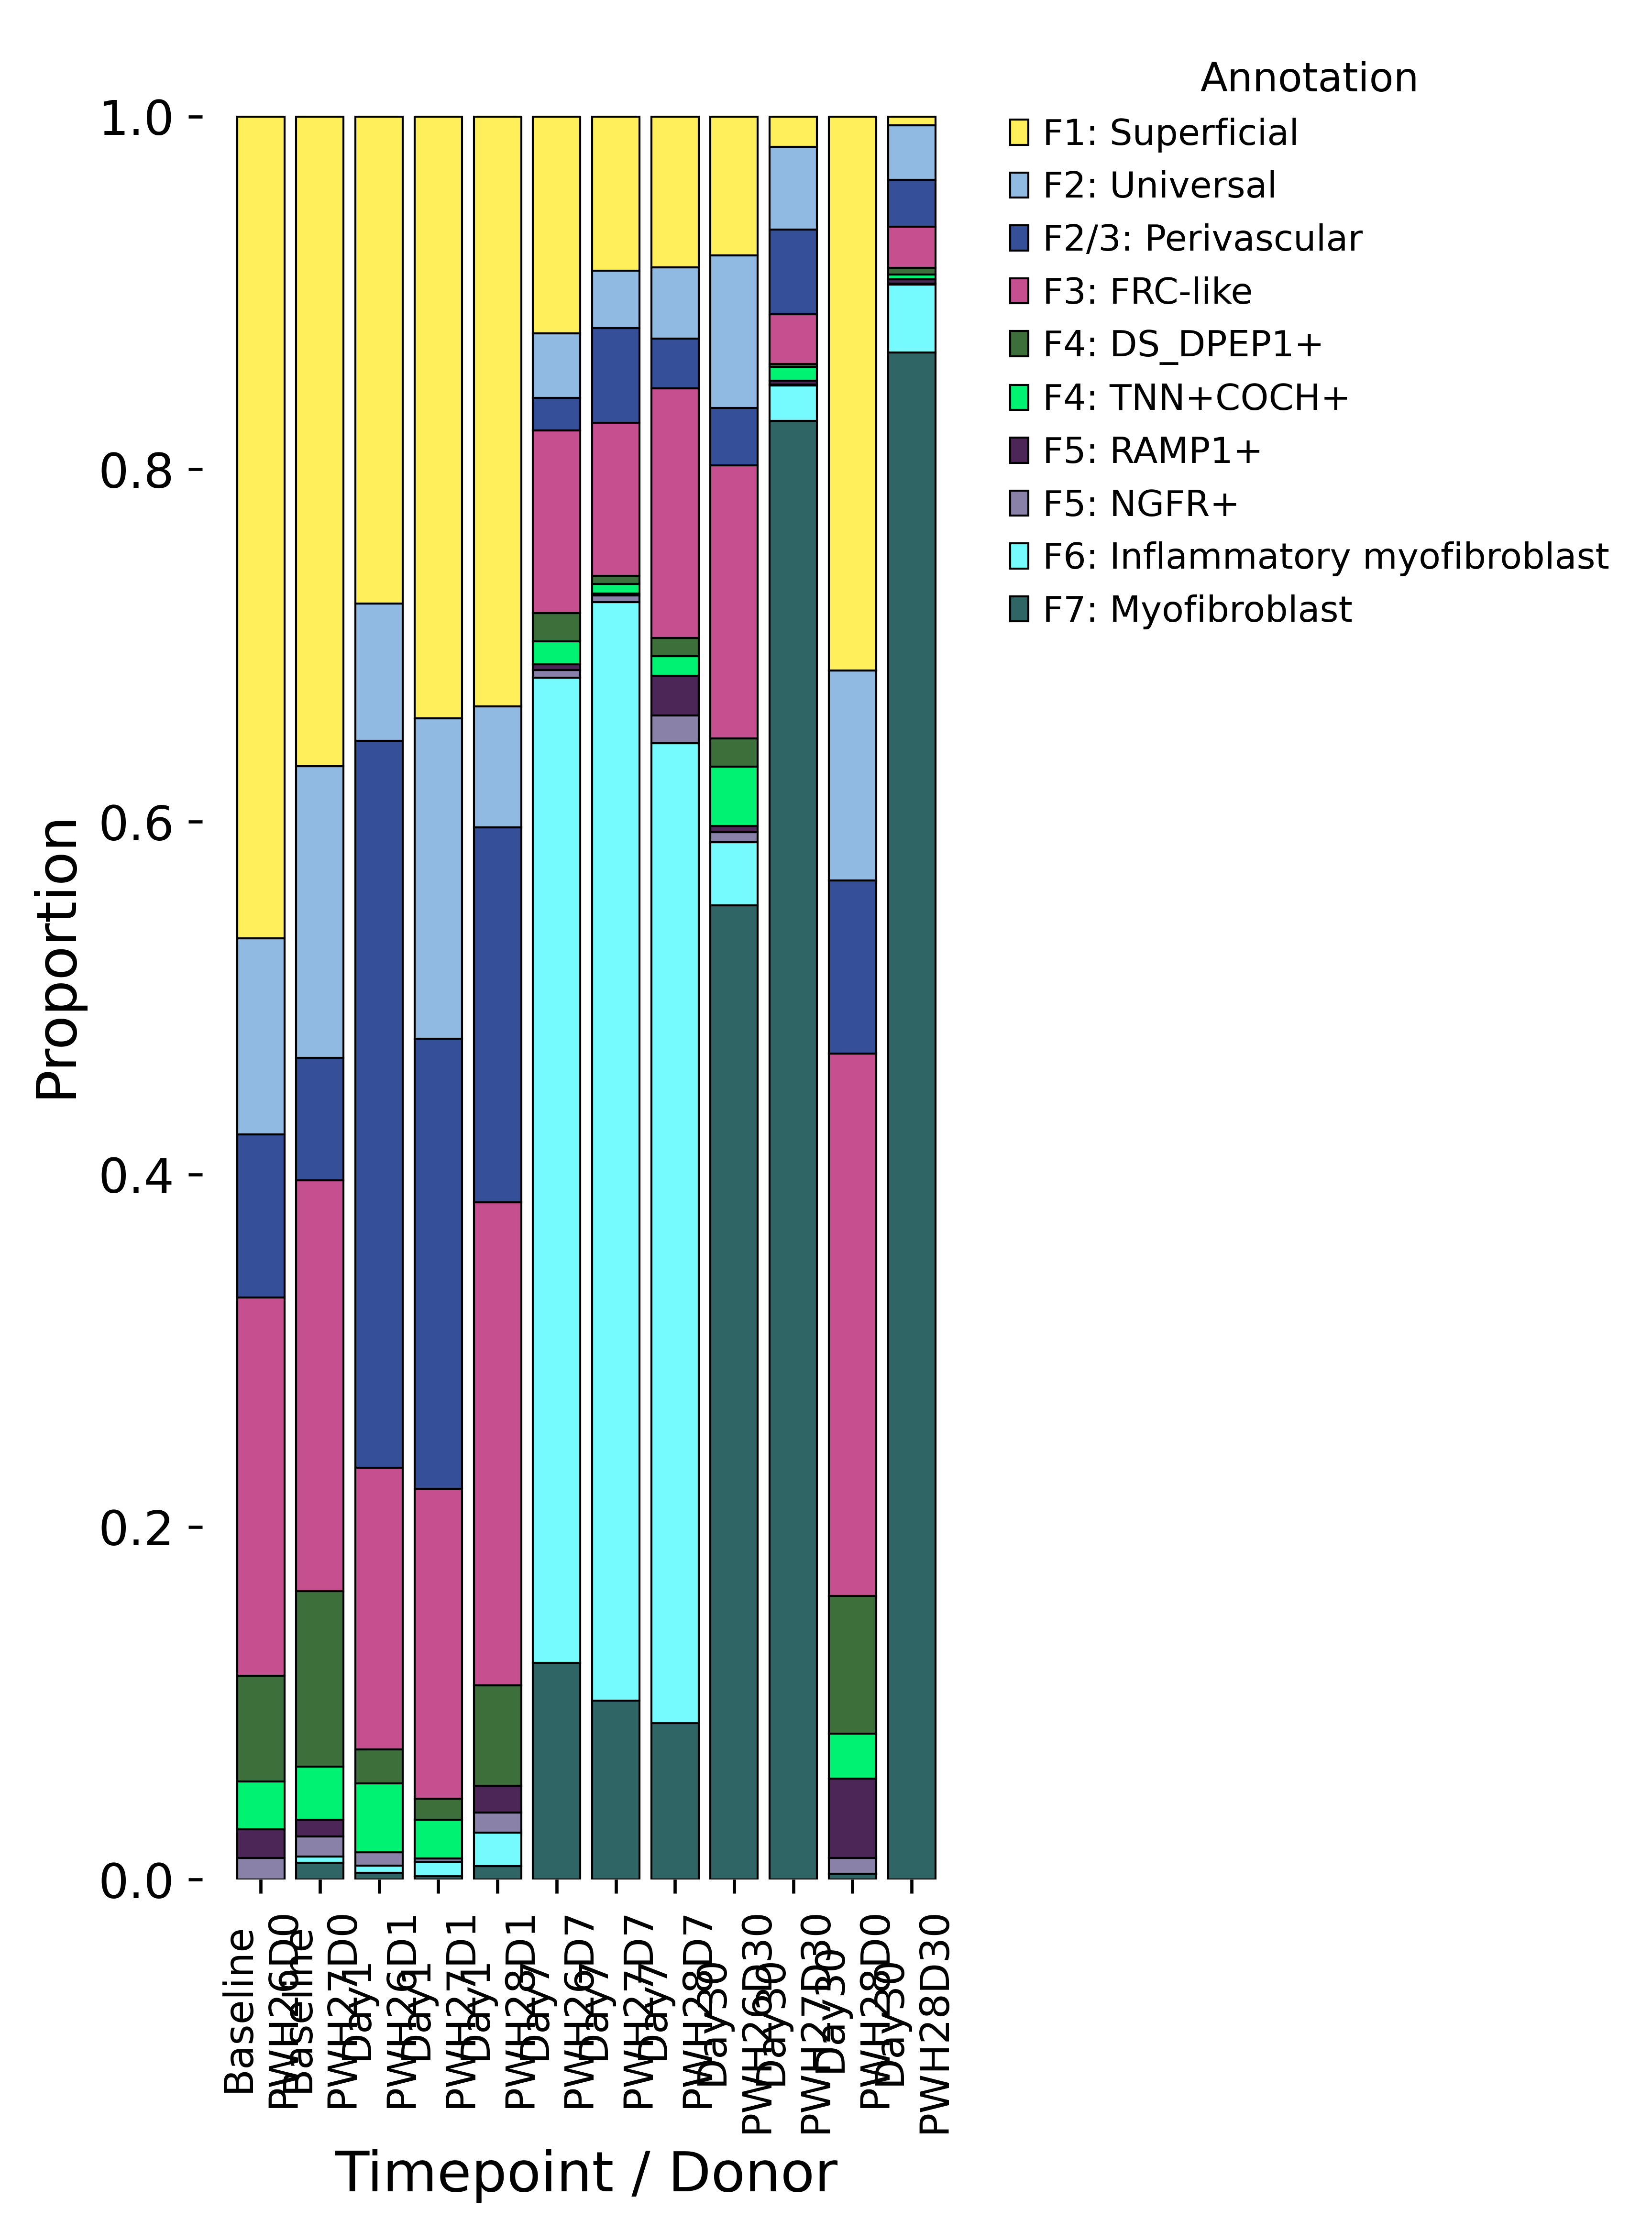

In [23]:


# Step 1: Compute proportions per donor per timepoint
grouped = (
    adata_i.obs
    .groupby(['Time', 'sample_id', 'annotation'], observed=True)
    .size()
    .unstack(fill_value=0)
)

# Normalize within each (Time, sample_id) row
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Reorder columns by your annotation order
ORDER = [
    'F1: Superficial', 'F2: Universal', 'F2/3: Perivascular', 'F3: FRC-like',
    'F4: DS_DPEP1+', 'F4: TNN+COCH+', 'F5: RAMP1+', 'F5: NGFR+', 
    'F6: Inflammatory myofibroblast', 'F7: Myofibroblast'
]
existing_order = [ann for ann in ORDER if ann in proportions.columns]
proportions = proportions[existing_order]

# Flatten the multiindex for plotting
proportions.index = proportions.index.set_names(['Time', 'Sample'])
proportions = proportions.reset_index()

# Sort for nice grouping
proportions = proportions.sort_values(by=["Time", "Sample"])

# Prepare bar positions
num_bars = len(proportions)
bar_width = 0.8
indices = np.arange(num_bars)

# Build bottom stacker
bottom = np.zeros(num_bars)

# Color list for annotations
color_list = [custom_colors.get(ann, np.array([0.8, 0.8, 0.8, 1.0])) for ann in proportions.columns[2:]]

# Start plotting
fig, ax = plt.subplots(figsize=(max(6, num_bars * 0.3), 8), dpi=300)

for i, annotation in enumerate(reversed(proportions.columns[2:])):
    heights = np.nan_to_num(proportions[annotation].values)

    ax.bar(
        indices,
        heights,
        bar_width,
        bottom=bottom,
        color=color_list[-(i + 1)],
        label=annotation,
        edgecolor="black" if np.any(heights > 0) else None,
        linewidth=0.5
    )
    bottom += heights

# Set X labels to Time + sample_id
xtick_labels = proportions.apply(lambda row: f"{row['Time']}\n{row['Sample']}", axis=1)
ax.set_xticks(indices)
ax.set_xticklabels(xtick_labels, rotation=90, fontsize=10)

# Labeling etc.
ax.set_ylabel('Proportion', fontsize=14)
plt.ylim(0, 1.05)
plt.yticks(fontsize=12)
ax.set_xlabel('Timepoint / Donor', fontsize=14)

# Remove spines and grid
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)

# Legend
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(
    reversed(handles), reversed(labels),
    bbox_to_anchor=(1.01, 1),
    loc='upper left',
    frameon=False,
    fontsize=9,
    title="Annotation",
    title_fontsize=10
)
plt.setp(legend.get_texts(), fontsize='9')

plt.tight_layout()
#plt.savefig("fig5/time_sample_grouped_barplot_bydonor.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [24]:
sample_to_time = dict(adata_i.obs[["sample_id", "Time"]].drop_duplicates().values)
sample_to_time

{'PWH26D30': 'Day30',
 'PWH28D1': 'Day1',
 'PWH27D0': 'Baseline',
 'PWH27D1': 'Day1',
 'PWH28D7': 'Day7',
 'PWH28D0': 'Day30',
 'PWH26D1': 'Day1',
 'PWH26D0': 'Baseline',
 'PWH26D7': 'Day7',
 'PWH27D30': 'Day30',
 'PWH27D7': 'Day7',
 'PWH28D30': 'Day30'}

In [25]:
RENAME = {'PWH26D30': 'Day30',
 'PWH28D1': 'Day1',
 'PWH27D0': 'Baseline',
 'PWH27D1': 'Day1',
 'PWH28D7': 'Day7',
 'PWH28D0': 'Baseline',
 'PWH26D1': 'Day1',
 'PWH26D0': 'Baseline',
 'PWH26D7': 'Day7',
 'PWH27D30': 'Day30',
 'PWH27D7': 'Day7',
 'PWH28D30': 'Day30'}
adata_i.obs["Time"] = adata_i.obs["sample_id"].map(RENAME)

/tmp/ipykernel_14375/1747517172.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  proportions_spaced = pd.concat(spaced, ignore_index=True)
/tmp/ipykernel_14375/1747517172.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=90, fontsize=12)


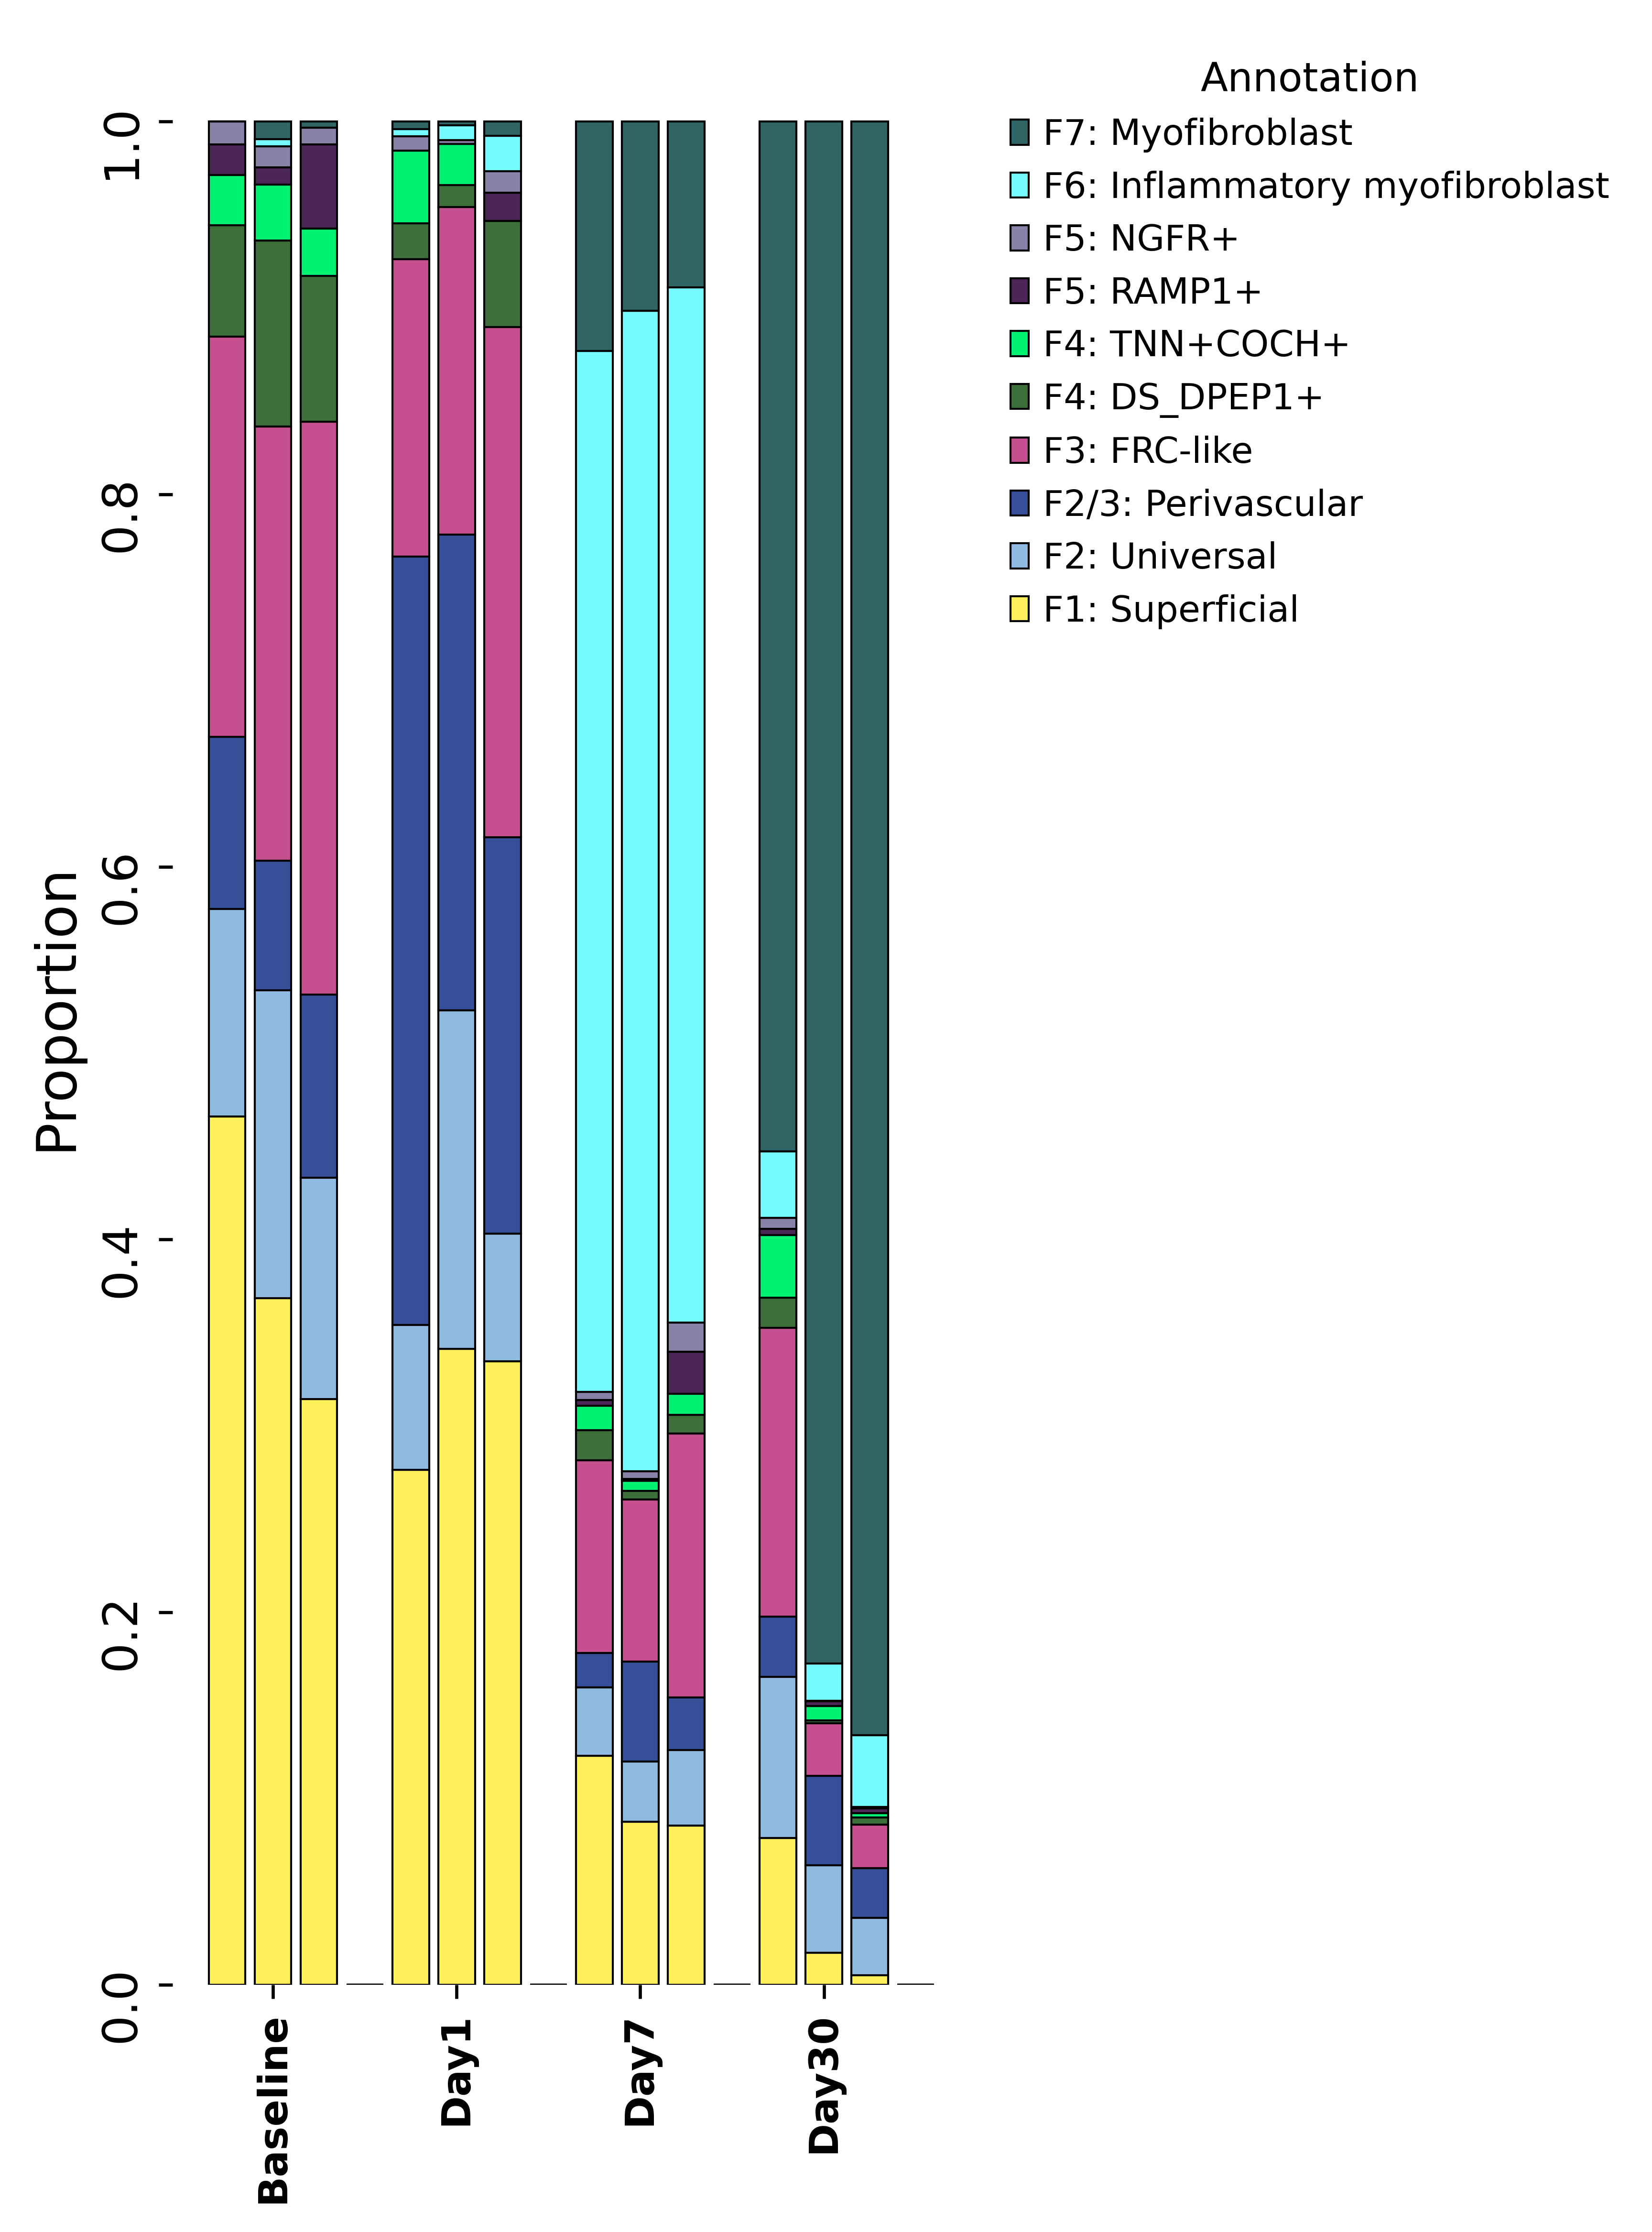

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Group and normalize
grouped = (
    adata_i.obs
    .groupby(['Time', 'sample_id', 'annotation'], observed=True)
    .size()
    .unstack(fill_value=0)
)
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# 2. Reorder columns

ORDER = [
    'F1: Superficial', 'F2: Universal', 'F2/3: Perivascular', 'F3: FRC-like',
    'F4: DS_DPEP1+', 'F4: TNN+COCH+', 'F5: RAMP1+', 'F5: NGFR+', 
    'F6: Inflammatory myofibroblast', 'F7: Myofibroblast'
]
ORDER=ORDER[::-1]
existing_order = [ann for ann in ORDER if ann in proportions.columns]
proportions = proportions[existing_order]


# 3. Reset index for manipulation
proportions.index = proportions.index.set_names(['Time', 'Sample'])
proportions = proportions.reset_index()
proportions = proportions.sort_values(by=["Time", "Sample"])
timepoint_order = ["Baseline", "Day1", "Day7", "Day30",]  # or whatever order you want
proportions["Time"] = pd.Categorical(proportions["Time"], categories=timepoint_order, ordered=True)
proportions = proportions.sort_values(by=["Time", "Sample"])

# 4. Add spacers
spaced = []
spacer_width = 1

for t in proportions["Time"].unique():
    group = proportions[proportions["Time"] == t]
    spaced.append(group)

    # Insert empty row
    spacer = pd.DataFrame(
        [[np.nan]*len(proportions.columns)],
        columns=proportions.columns
    )
    spacer["Time"] = t  # just for grouping consistency
    spaced.append(spacer)

proportions_spaced = pd.concat(spaced, ignore_index=True)

# 5. Plotting
num_bars = len(proportions_spaced)
indices = np.arange(num_bars)
bar_width = 0.8

fig, ax = plt.subplots(figsize=(max(6, num_bars * 0.25), 8), dpi=300)
bottom = np.zeros(num_bars)




annotation_cols = proportions.columns[2:]  # skip Time and Sample
color_list = [custom_colors.get(ann, np.array([0.8, 0.8, 0.8, 1.0])) for ann in annotation_cols]

for i, annotation in enumerate(reversed(annotation_cols)):
    heights = np.nan_to_num(proportions_spaced[annotation].values)
    ax.bar(
        indices,
        heights,
        bar_width,
        bottom=bottom,
        color=color_list[-(i + 1)],
        edgecolor="black" if np.any(heights > 0) else None,
        linewidth=0.5,
        label=annotation
    )
    bottom += heights



# 6. Set x-ticks (only show labels on center of each Time block)
tick_positions = []
tick_labels = []
running = 0

for t in proportions["Time"].unique():
    group_len = len(proportions[proportions["Time"] == t])
    center = running + (group_len - 1) / 2
    tick_positions.append(center)
    tick_labels.append(t)
    running += group_len + 1  # +1 for spacer

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, fontsize=10, fontweight='bold', rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=90, fontsize=12)

# 7. Final touches
ax.set_xlabel('', fontsize=1)
ax.set_ylabel('Proportion', fontsize=14)
plt.yticks(fontsize=12)
plt.ylim(0, 1.05)

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(
    reversed(handles), reversed(labels),
    bbox_to_anchor=(1.01, 1),
    loc='upper left',
    frameon=False,
    fontsize=9,
    title="Annotation",
    title_fontsize=10
)
plt.setp(legend.get_texts(), fontsize='9')

for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)

plt.tight_layout()
plt.savefig("fig5/time_grouped_by_donor_bars_spaced.pdf", dpi=300, bbox_inches="tight")
plt.show()

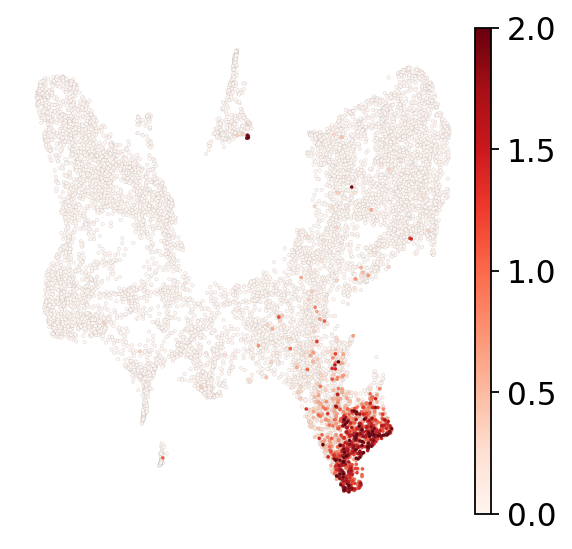

In [28]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(4, 4))

sc.pl.umap(
    adata_i,
    color=["MKI67" ],
    s=10,
    palette=custom_palette,   
#    legend_fontoutline=2,
    legend_fontsize=100,
      #  save="wounds_umap_time.pdf",
        edgecolor='grey', 
    cmap="Reds",
    linewidth=.05,
    vmax=2,
    title='',
    save="fig5_mki67_wound.pdf",
    
)

# sfig 7d

In [29]:
sc.settings.figdir = "sfig7"


/tmp/ipykernel_14375/606058888.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ii.obs["Time_labelled"] = adata_ii.obs["Time"].map(lambda t: f"{t} (n={cell_counts[t]})")


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

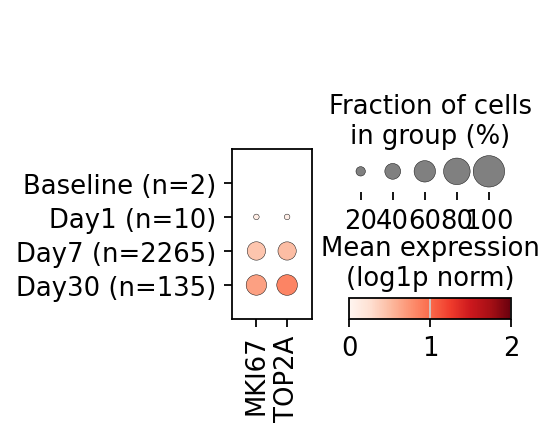

In [30]:
import scanpy as sc

adata_ii=adata_i[adata_i.obs["annotation"].str.startswith("F6")]
cell_counts = adata_ii.obs["Time"].value_counts().to_dict()

# Append the cell count to each time label
adata_ii.obs["Time_labelled"] = adata_ii.obs["Time"].map(lambda t: f"{t} (n={cell_counts[t]})")

# Make the dot plot with modified labels
sc.pl.dotplot(
    adata_ii,
    ["MKI67", "TOP2A"],  # Proliferation genes
    groupby="Time_labelled",  # Use new labels
    colorbar_title="Mean expression\n(log1p norm)", 
    vmax=2,
    dendrogram=False,
    dot_max=1,
    save="7d_prolif_f6.pdf"
)

# sfig7e

In [31]:
sc.tl.paga(adata_i, groups="annotation")  #neighbors_key="neighbor_20")
    

<Axes: >

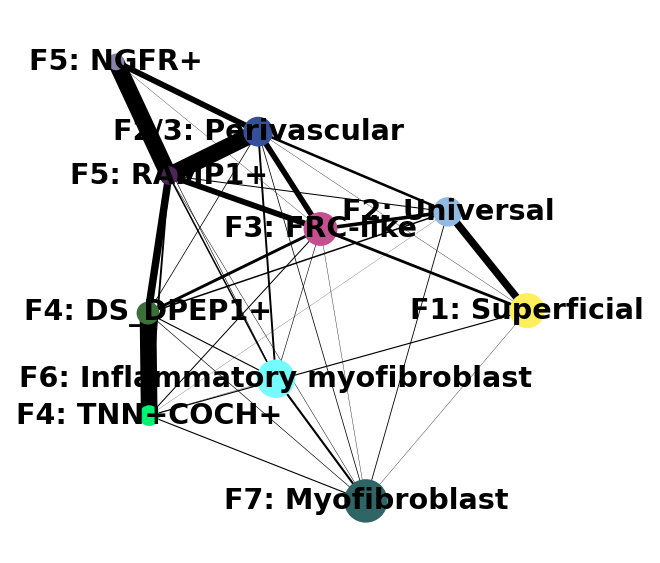

In [32]:
sc.pl.paga(adata_i, show=False)

In [33]:
sc.tl.umap(adata_i, init_pos='paga')# neighbors_key="neighbor_20")


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/umap/dist

In [34]:

# sc.pl.umap(adata_i, color='annotation', frameon=False, legend_loc='on data', title='') #neighbors_key="n" )# save='_celltypes.pdf')


In [35]:
THRESHOLD=0.1

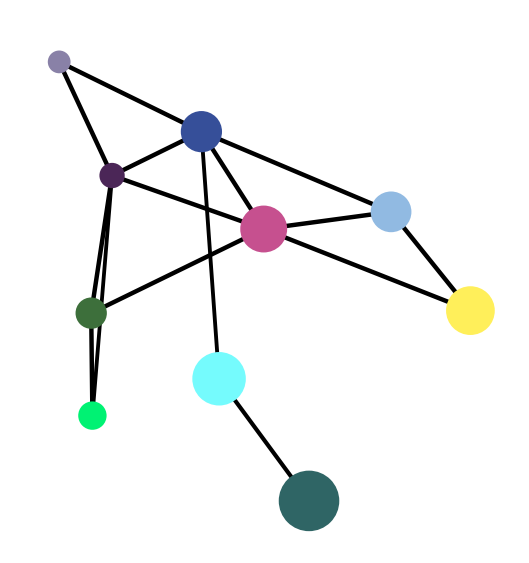

In [36]:
sc.pl.paga(adata_i, threshold=THRESHOLD , title='',edge_width_scale=2,max_edge_width=2 ,pos = adata_i.uns['paga']['pos'],fontsize=0 ,fontoutline=0 ,  text_kwds={'alpha':0},labels = None,
           fontweight='bold' , node_size_scale=2.0)#ax=ax)

In [37]:
adata_i.obs["test12"]=adata_i.obs["annotation"]
adata_i.obs["test13"]=adata_i.obs["annotation"]

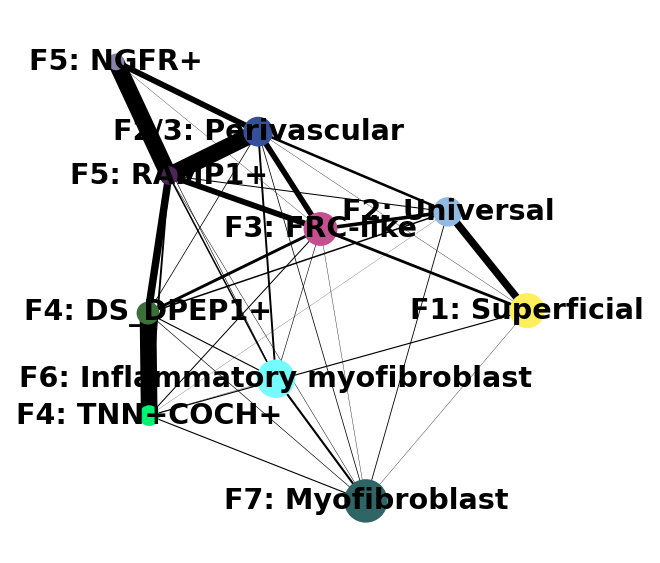

In [38]:
sc.pl.paga(adata_i, plot=True) 


In [39]:
adata=adata_i

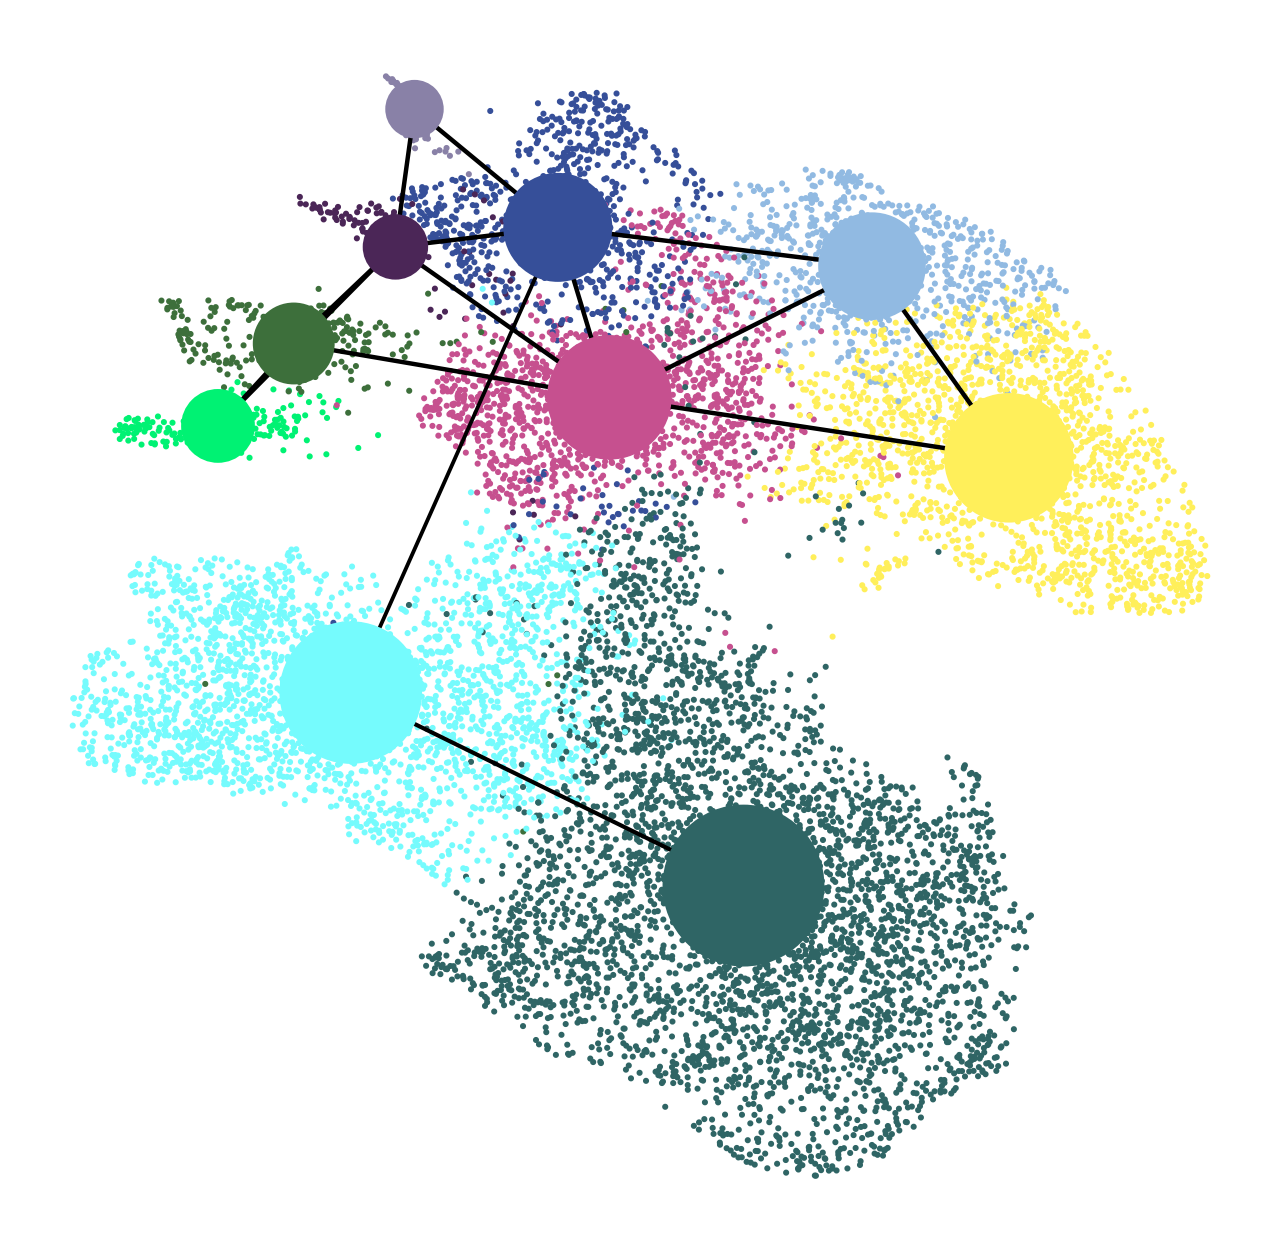

In [40]:

THRESHOLD=0.1

adata.obs["cell.labels"]=adata.obs["test13"]
adata.uns["cell.labels_colors"]=adata.uns["annotation_colors"]
cells = adata.obs['cell.labels'].cat.categories
cells = adata.obs['test13'].cat.categories
var="annotation"

embed = 'X_umap'
pos = []
for i in cells:
    tmp = adata[adata.obs['test12'].isin([i])]
    tmp_emded = tmp.obsm[embed]
    # get centroids
    x = [p[0] for p in tmp_emded]
    y = [p[1] for p in tmp_emded]
    centroid = (sum(x) / len(tmp_emded), sum(y) / len(tmp_emded))
    pos.append(centroid)
    
adata.uns['paga-back'] = adata.uns['paga'].copy()
adata.uns['paga']['pos']= np.array(pos)
fig, ax = plt.subplots(1,figsize=(10,10))


#var = 'cell.labels'

mapper = dict(zip(list(adata.obs[var].cat.categories),list(adata.uns[var+'_colors'])))
adata.obs['col'] = adata.obs[var].astype(str).map(mapper)
#ax=sc.pl.umap(adata, color='test13', frameon=False, legend_loc='on data', title='') #neighbors_key="n" )# save='_celltypes.pdf')

ax.scatter(adata.obsm[embed][:,0], adata.obsm[embed][:,1],c=adata.obs['col'],s=3)
sc.pl.paga(adata, threshold=THRESHOLD , title='',edge_width_scale=2,max_edge_width=2 ,pos = adata.uns['paga']['pos'],fontsize=0 ,fontoutline=0 ,  text_kwds={'alpha':0},labels = None,
           fontweight='bold' , node_size_scale=15.0,ax=ax,
          save="sfig7e.pdf")

In [ ]:
sc.logging.print_versions()


